In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [28]:
target_vars= pd.read_csv("C:\\Users\\DP250369\\Downloads\\train_labels.csv")
feature_vars=pd.read_csv("C:\\Users\\DP250369\\Downloads\\train_values.csv")
test_vars=pd.read_csv('C:\\Users\\DP250369\\Downloads\\test_values.csv')


In [29]:
target_vars.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [30]:
feature_vars.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [31]:
test_vars.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [32]:
feature_vars.columns.tolist()


['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

In [33]:
feature_vars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [8]:
feature_vars.describe()


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [34]:
test_vars2=test_vars.copy()
feature_vars=feature_vars.drop('patient_id',axis=1)
#level_map = {'normal': 1, 'fixed_defect': 2 ,'reversible_defect': 3}
#feature_vars['thal_c']=feature_vars['thal'].map(level_map)
feature_vars=pd.get_dummies(feature_vars)
#feature_vars=feature_vars.drop('thal',axis=1)


X=feature_vars.values
y=target_vars['heart_disease_present'].values

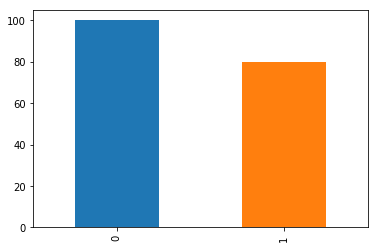

In [35]:
target_vars['heart_disease_present'].value_counts().plot(kind='bar')

In [36]:
feature_vars.columns.tolist()

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect']

In [37]:
feature_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
thal_fixed_defect                       180 non-null uint8
thal_normal                             180 non-null uint8
thal_reversible_defect                  180 non-null uint8
dtypes: 

In [38]:
test_vars=test_vars.drop('patient_id',axis=1)
test_vars=pd.get_dummies(test_vars)
#test_vars=test_vars.drop('thal',axis=1)
X_test=test_vars.values

knn=LogisticRegression()

knn.fit(X,y)
knn.predict_proba(X)
print(knn.score(X,y))
knn.predict_proba(X_test)
y_test=knn.predict_proba(X_test)
df=pd.DataFrame({'heart_disease_present':y_test[:,1]})
df['patient_id']=test_vars2['patient_id'].values

title=['patient_id','heart_disease_present']
df=df.reindex(columns=title)

0.8777777777777778


In [39]:

print(df.dtypes.value_counts())
df=df.astype({'heart_disease_present': float})
print('*'*20)
print(df.dtypes.value_counts())

object     1
float64    1
dtype: int64
********************
object     1
float64    1
dtype: int64


In [40]:
print(df)

df.to_csv('C:\\Users\\DP250369\\Downloads\\test_labels.csv', index=False)



   patient_id  heart_disease_present
0      olalu7               0.214471
1      z9n6mx               0.086233
2      5k4413               0.960191
3      mrg7q5               0.063471
4      uki4do               0.916760
5      kev1sk               0.047570
6      9n6let               0.088650
7      jxmtyg               0.960242
8      51s2ff               0.103107
9      wi9mcs               0.151231
10     741h4l               0.419411
11     1ef64a               0.601157
12     wa2ix6               0.242041
13     8167zl               0.985995
14     n6nldr               0.063759
15     ph85fp               0.028966
16     jfan5p               0.025240
17     7c4iz1               0.054734
18     ukigml               0.939865
19     flwvnq               0.061700
20     5i4fw2               0.963568
21     du1pqf               0.170519
22     vs68qz               0.132518
23     pfyez0               0.009023
24     azvkw2               0.396432
25     cird1i               0.947262
2